In [1]:
import numpy as np
import pandas as pd
import math
import time
import re
import os
from tkinter import filedialog
from tkinter import *
from scipy.io import wavfile
from skimage import util
from scipy import signal
from scipy import stats

from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.decomposition import PCA

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

In [2]:
slices_path = 'C:/Users/Schindler/Documents/ProgrammingFun/Scripts/iPythonScripts/USV_python/600_annot_slices.csv'

In [3]:
data = pd.read_csv(slices_path)
annot_slices = pd.DataFrame(data = data)
print(annot_slices.shape)
annot_slices.head()

(552, 14136)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134
0,376560.0,0.057574,0.276893,0.528347,0.292352,0.967029,0.870557,0.288755,0.079022,1.101868,...,0.000009,0.000273,0.440910,0.040381,0.000693,0.084317,0.023230,0.015769,0.014675,0.077264
1,46305.0,0.011731,0.015517,0.001648,0.023396,0.003553,0.024199,0.257330,0.489177,0.373989,...,0.380229,0.000122,0.001736,0.007309,0.080183,0.083992,0.001830,0.020050,0.014924,0.059639
2,243270.0,0.008349,0.045459,0.472885,0.013214,0.057216,0.213565,0.059728,0.100463,0.006411,...,0.796693,0.005770,0.102972,0.008888,0.032086,0.006897,0.010392,0.002170,0.001961,0.031503
3,149692.5,0.011466,0.115345,0.000060,0.007044,0.003821,0.013232,0.260313,0.210111,0.069277,...,0.005605,0.030256,0.002974,0.038545,0.161589,0.043518,0.010613,0.001752,0.237444,0.009262
4,243157.5,0.024836,0.357126,0.115264,0.123585,0.186216,0.031609,0.192183,0.118203,3.902143,...,0.093640,0.081336,0.000161,0.051696,0.013878,0.016102,0.045677,0.040600,0.004259,0.042656


In [4]:
annot_slices.set_index('Unnamed: 0', inplace=True)
annot_slices.head()

,0,1,2,3,4,5,6,7,8,9,...,14125,14126,14127,14128,14129,14130,14131,14132,14133,14134
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
376560.0,0.057574,0.276893,0.528347,0.292352,0.967029,0.870557,0.288755,0.079022,1.101868,0.462441,...,0.000009,0.000273,0.440910,0.040381,0.000693,0.084317,0.023230,0.015769,0.014675,0.077264
46305.0,0.011731,0.015517,0.001648,0.023396,0.003553,0.024199,0.257330,0.489177,0.373989,0.130828,...,0.380229,0.000122,0.001736,0.007309,0.080183,0.083992,0.001830,0.020050,0.014924,0.059639
243270.0,0.008349,0.045459,0.472885,0.013214,0.057216,0.213565,0.059728,0.100463,0.006411,0.000584,...,0.796693,0.005770,0.102972,0.008888,0.032086,0.006897,0.010392,0.002170,0.001961,0.031503
149692.5,0.011466,0.115345,0.000060,0.007044,0.003821,0.013232,0.260313,0.210111,0.069277,0.003123,...,0.005605,0.030256,0.002974,0.038545,0.161589,0.043518,0.010613,0.001752,0.237444,0.009262
243157.5,0.024836,0.357126,0.115264,0.123585,0.186216,0.031609,0.192183,0.118203,3.902143,1.734283,...,0.093640,0.081336,0.000161,0.051696,0.013878,0.016102,0.045677,0.040600,0.004259,0.042656


In [5]:
feature_df = pd.DataFrame(index = annot_slices.index, columns = ['time_stamp', 'spec_flat', 'power_sum'], dtype=float)

for index, row in annot_slices.iterrows():

    feature_df.loc[index]['time_stamp'] = index
    #spectral flattness
    feature_df.loc[index]['spec_flat'] = stats.gmean(row) / row.mean()
    #power sum
    feature_df.loc[index]['power_sum'] = row.sum()

feature_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

,time_stamp,spec_flat,power_sum
Unnamed: 0,,,
376560.0,376560.0,0.155727,98748.960555
46305.0,46305.0,0.368722,32714.903093
243270.0,243270.0,0.232295,63014.446725
149692.5,149692.5,0.306856,43037.465935
243157.5,243157.5,0.062226,270193.532269


In [6]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 552 entries, 376560.0 to 239805.0
Data columns (total 3 columns):
time_stamp    546 non-null float64
spec_flat     546 non-null float64
power_sum     546 non-null float64
dtypes: float64(3)
memory usage: 37.2 KB


In [7]:
annot_path = "C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/USV/annot_info_df.xlsx"
data = pd.read_excel(annot_path)
annot_info = pd.DataFrame(data = data)
print(annot_info.shape)
annot_info.head()

(552, 6)


,Begin Time (s),Annotation,Animal,Group,Begin Time (s)_1000,time_stamp
0,376.574455,low slug,533,5,376574.45450,376560.0
1,46.306579,low slug,533,5,46306.57941,46305.0
2,243.272865,low slug,533,5,243272.86510,243270.0
3,149.708324,low slug,533,5,149708.32400,149692.5
4,243.176192,low slug,533,5,243176.19170,243157.5


In [8]:
annot_info.set_index('time_stamp', inplace=True)
annot_info.head()

,Begin Time (s),Annotation,Animal,Group,Begin Time (s)_1000
time_stamp,,,,,
376560.0,376.574455,low slug,533,5,376574.45450
46305.0,46.306579,low slug,533,5,46306.57941
243270.0,243.272865,low slug,533,5,243272.86510
149692.5,149.708324,low slug,533,5,149708.32400
243157.5,243.176192,low slug,533,5,243176.19170


In [52]:
features_with_info = pd.concat([annot_info, feature_df], axis=1)
print(features_with_info.shape)
features_with_info.dropna(axis = 0, inplace=True)
features_with_info.head(50)

(552, 8)


,Begin Time (s),Annotation,Animal,Group,Begin Time (s)_1000,time_stamp,spec_flat,power_sum
376560.0,376.574455,low slug,533,5,376574.454500,376560.0,0.155727,98748.960555
46305.0,46.306579,low slug,533,5,46306.579410,46305.0,0.368722,32714.903093
243270.0,243.272865,low slug,533,5,243272.865100,243270.0,0.232295,63014.446725
149692.5,149.708324,low slug,533,5,149708.324000,149692.5,0.306856,43037.465935
243157.5,243.176192,low slug,533,5,243176.191700,243157.5,0.062226,270193.532269
337747.5,337.761516,low slug,533,5,337761.516000,337747.5,0.082071,239525.503692
326407.5,326.428670,radar,533,5,326428.669900,326407.5,0.124940,113329.788879
328275.0,328.285275,radar,533,5,328285.275000,328275.0,0.128860,141455.771419
329670.0,329.691002,radar,533,5,329691.002200,329670.0,0.215361,67028.666114
314977.5,314.995054,radar,533,5,314995.054000,314977.5,0.091715,174229.853821


In [53]:
features_with_info.groupby('Annotation')['power_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
Annotation,,,,,,,,
bbc,16.0,2.040783e+05,1.933221e+05,65204.579293,118303.708439,157959.000681,179809.255671,8.720126e+05
high multi,5.0,2.495828e+05,2.766522e+05,36262.823360,82139.884439,85348.324129,353085.744318,6.910773e+05
high slug,9.0,2.744756e+05,2.536576e+05,33684.505775,35585.749435,241675.038673,423924.343339,6.687877e+05
low multi,16.0,3.965784e+05,3.698305e+05,45047.931416,175342.738599,243228.849389,552366.113060,1.366219e+06
low slug,60.0,1.042346e+05,1.514156e+05,29249.725489,45506.960588,59882.007608,111231.030926,1.161364e+06
noise,75.0,2.590662e+06,7.979640e+06,36285.484867,82726.628890,263591.988961,860112.283003,4.937721e+07
radar,365.0,1.398070e+05,9.293795e+04,30821.218661,86683.437453,123408.241084,161698.890938,1.145453e+06


In [54]:
features_with_info.groupby('Annotation')['spec_flat'].describe()

,count,mean,std,min,25%,50%,75%,max
Annotation,,,,,,,,
bbc,16.0,0.101816,0.046395,0.026119,0.085418,0.089934,0.118413,0.219365
high multi,5.0,0.178159,0.120824,0.047601,0.077175,0.207964,0.208621,0.349433
high slug,9.0,0.177870,0.146711,0.045738,0.051601,0.082861,0.354162,0.370857
low multi,16.0,0.099359,0.075949,0.027210,0.043118,0.084821,0.105717,0.297074
low slug,60.0,0.221923,0.096959,0.017949,0.135429,0.229621,0.299701,0.405450
noise,75.0,0.125578,0.113946,0.002802,0.030875,0.075092,0.215391,0.380114
radar,365.0,0.138500,0.059485,0.026562,0.098607,0.124074,0.171398,0.383648


In [ ]:
plt.hist(annot_features_df_535_low_multi_slices['power_sum'].values)
plt.show()

In [56]:
features = features_with_info[['spec_flat', 'power_sum']]
features.head()

,spec_flat,power_sum
376560.0,0.155727,98748.960555
46305.0,0.368722,32714.903093
243270.0,0.232295,63014.446725
149692.5,0.306856,43037.465935
243157.5,0.062226,270193.532269


In [57]:
# center and scale the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled[0:50]

array([[ 0.13545601, -0.12635956],
       [ 2.74771308, -0.14795174],
       [ 1.07451898, -0.13804422],
       [ 1.98896143, -0.14457641],
       [-1.0112724 , -0.07029967],
       [-0.76789045, -0.08032767],
       [-0.24212691, -0.12159184],
       [-0.19405059, -0.11239505],
       [ 0.86683668, -0.13673163],
       [-0.64960704, -0.1016784 ],
       [-0.8277754 , -0.08084226],
       [-0.56195324, -0.10612934],
       [-0.48061519, -0.10426423],
       [-0.38708469, -0.11267715],
       [-0.01056233, -0.12115788],
       [-0.34717864, -0.10829472],
       [-0.20641541, -0.11546318],
       [-0.87012327, -0.07848973],
       [-0.95997941, -0.07342292],
       [-0.68641777, -0.10368001],
       [-0.28840943, -0.1221767 ],
       [-0.22476416, -0.11574503],
       [ 1.45111944, -0.14081689],
       [-0.96458991, -0.07029897],
       [-0.83874465, -0.08562431],
       [-0.76072702, -0.09956744],
       [-0.65455471, -0.10124609],
       [-0.79268428, -0.09359453],
       [-0.21237692,

2
[0.9010618360263929]
3
[0.9010618360263929, 0.6369521501790929]
4
[0.9010618360263929, 0.6369521501790929, 0.5528834101236241]
5
[0.9010618360263929, 0.6369521501790929, 0.5528834101236241, 0.5341321761925638]
6
[0.9010618360263929, 0.6369521501790929, 0.5528834101236241, 0.5341321761925638, 0.5338350046772432]
7
[0.9010618360263929, 0.6369521501790929, 0.5528834101236241, 0.5341321761925638, 0.5338350046772432, 0.5477414504486934]
8
[0.9010618360263929, 0.6369521501790929, 0.5528834101236241, 0.5341321761925638, 0.5338350046772432, 0.5477414504486934, 0.5359254072824668]
9
[0.9010618360263929, 0.6369521501790929, 0.5528834101236241, 0.5341321761925638, 0.5338350046772432, 0.5477414504486934, 0.5359254072824668, 0.5388793937143018]


Text(0,0.5,'Silhouette Coefficient')

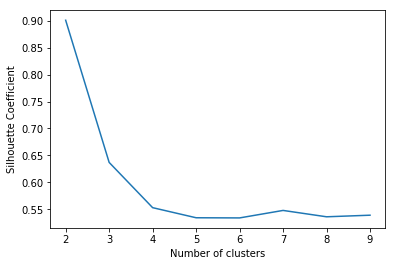

In [58]:
k_range = range(2,10)
scores = []
for k in k_range:
    print(k)
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(features_scaled)
    scores.append(silhouette_score(features_scaled, km_ss.labels_))
    print(scores)

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [60]:
km4 = KMeans(n_clusters=4,random_state=1)
km4.fit(features_scaled)
score = silhouette_score(features_scaled, km_ss.labels_)
features_with_info['kmeans_4_scaled'] = [ "cluster_" + str(label) for label in km4.labels_ ]
#summary_ave.groupby('kmeans_2_scaled').mean()
print(score)

0.5388793937143018


In [62]:
features_with_info.groupby('Annotation')['kmeans_4_scaled'].value_counts()

Annotation  kmeans_4_scaled
bbc         cluster_0           13
            cluster_1            3
high multi  cluster_0            2
            cluster_1            2
            cluster_3            1
high slug   cluster_0            5
            cluster_3            3
            cluster_1            1
low multi   cluster_0           13
            cluster_1            2
            cluster_3            1
low slug    cluster_3           25
            cluster_1           19
            cluster_0           16
noise       cluster_0           43
            cluster_1           16
            cluster_3           12
            cluster_2            4
radar       cluster_0          219
            cluster_1          129
            cluster_3           17
Name: kmeans_4_scaled, dtype: int64